## Law of the wall

In [1]:
%matplotlib inline
#%matplotlib qt

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Steps to plot the law of the wall

Recall that $y^+ = \dfrac{U_{\tau} y}{\nu}$. You can see this qunatity as a Reynolds number normal to the wall.

In the previous definition of $y^+$,

- $U_{\tau}$ is the shear velocity and is equal to $U_{\tau} = \sqrt{\dfrac{\tau_{wall}}{\rho}}$.

- $y$ is the distance normal to the wall.

- $\nu$ is the kinematic viscosity.

- The non-dimensional velocity $U^+$ is computed as follows, $U^+ = \dfrac{U}{U_{\tau}}$, where $U$ is the velocity magnitude normal to wall

- The quantities $y$, $y^+$, $U$ are sample in a line normal to the wall. Be careful, $y$ starts from zero.

- The wall shear stress $\tau_{wall}$ used to compute the shear velocity $U_{\tau}$ is sampled at the wall in the same location as the line normal to the wall. You can compute $\tau_{wall}$ directly in the solver (easiest way) or you can approximate it using the relation $\tau_{wall} = \mu \dfrac{\partial U}{\partial y}$

- At this point, you can plot $U^+$ vs. $y^+$. The x-axis is in logarithmic scale.

### Compute viscous sublayer and log-law correlations

In [3]:
#Compute therorical profiles

#x=np.linspace(0.1,100000,1000000)
x1=np.linspace(0.1,20,10000)
x2=np.linspace(5,100000,10000)

#Linearly spaced yplus values to be used with the correlations
yp1=x1
yp2=x2

#Viscous sub-layer
up1=yp1

#Low-law
up2=(1.0/0.41)*np.log(yp2)+5.0


The law of the viscous sub-layer is computed as follows, $U^+ = y^+$

The log-law is computed as follows, $U^+ = \dfrac{1}{k} ln y^+ + C$, where $k \approx 0.41$ (Karman constant) and $C \approx 5.0$

### Compute spalding law

In [4]:
#Spalding universal law

#Linearly spaced yplus values to be used with the correlations
up3 = np.linspace(0,30,10000)

#E = 9.025
#k = 0.4
#B = 5.5

E = 9.1
k = 0.42

#E = 8.6
#k = 0.417
    
sl = up3 + (1/E)*( np.exp(k*up3) - 1 - (k*up3) - ((k*up3)**2)/2  - ((k*up3)**3)/6 - ((k*up3)**4)/24 )


The Spalding law is computed as follows, $y^+ = U^+ + \dfrac{1}{E} \left[  e^{k U^+}  - 1 - \dfrac{k U^+}{1!} - \dfrac{ \left( k U^+ \right)^2}{2!}  - \dfrac{ \left( k U^+ \right)^3}{3!}  - \dfrac{ \left( k U^+ \right)^4}{4!} \right]$ 

where $k$ is the Karman constant and $E$ is another constant needed to fit the curve

$\dfrac{1}{E}$ can be approximated as $e^{-k C^+}$

- Reported values of $C^+$ can go anywhere from 4.5 to 5.5

- Reported values of $k$ can go anywhere from 0.36 to 0.42

- Reported values of $E$ can go anywhere from 8.5 to 9.3

### U+ vs. y+ plot (only correlations)

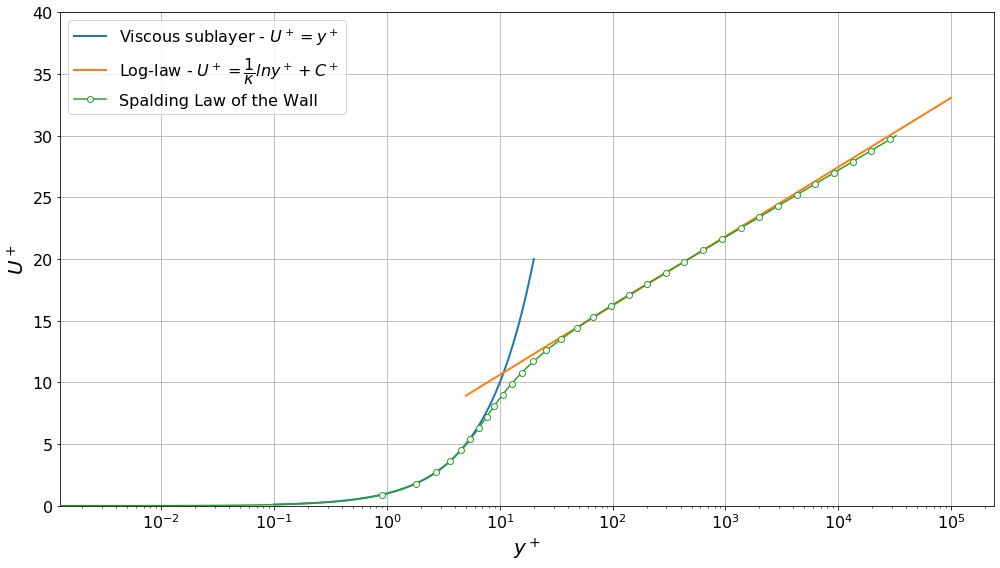

In [5]:
#Plot profiles

plt.figure(figsize=(14, 8))

#Correlations
plt.plot(yp1,up1,label='Viscous sublayer - $U^+=y^+$',lw=2)
plt.plot(yp2,up2,label='Log-law - $U^+ = \dfrac{1}{\kappa} ln y^+ + C^+$',lw=2)

#External data
#plt.plot(al,cfl3d[:,1],'o-',label='DNS [1]',markerfacecolor='white',markevery=10,zorder=9)

#plt.plot(exp1[:,0],exp1[:,1],'-o',label='Experimental [2]',markerfacecolor='white',markeredgecolor='red',zorder=10)
#plt.plot(exp2[:,5],exp2[:,6],'-o',label='Experimental [3]',markerfacecolor='white',zorder=11)

plt.plot(sl,up3,'o-',label='Spalding Law of the Wall',markerfacecolor='white',markevery=300,zorder=12)


plt.xscale('log')
#plt.xlim(0.1,1000000)
plt.ylim(0,40)

plt.grid()

plt.tick_params(labelsize=16)
plt.legend(loc=0,fontsize=16)

plt.xlabel('$y^+$', fontsize=20)
plt.ylabel('$U^+$', fontsize=20)

plt.tight_layout()

#plt.savefig("figbl.png")
#plt.savefig("figbl.svg")

### U+ vs. y+ plot - Together with correlations and outcome of numerical simulations and physical experiments

### Load data

Remember, the data can be cell centered or node centered

In [6]:
#Load data using numpy

#If loading xy file from fluent remember to erase last parenthesis
#You can also manipulate the file in python

#Velocity data sampled along a line

data_vel1_nc   = np.loadtxt('flat_plate_results/lowRE/vel_nc',skiprows=4)
data_vel2_nc   = np.loadtxt('flat_plate_results/highRE/vel_nc',skiprows=4)
data_vel1      = np.loadtxt('flat_plate_results/lowRE/vel_cc',skiprows=4)
data_vel2      = np.loadtxt('flat_plate_results/highRE/vel_cc',skiprows=4)


In [7]:
#load cfl3d data at x=1.90334
cfl3d = np.loadtxt("flat_plate_results/CFL3D_X2.txt",skiprows=2)

#Antilogarithm of input data
al=10**cfl3d[:,0]

In [8]:
#Load experimental data from
#https://www.flow.kth.se/flow-database/experimental-data-1.791818 (APG database)

exp2 = np.loadtxt("flat_plate_results/APG12_U30_x3900_May15.txt",skiprows=32)

### Compute $y^+$ and $U^+$ from numerical simulations

In [9]:
#Reference flow properties
U=1
rho=1

mu=2.e-7
nu=mu/rho


In [10]:
#LOW-RE simulation
#It must be the shear stress value at the wall not the cell center

#Value from sampling file
ws1=0.00125308 

#numerical gradient du/dy
grad1=data_vel1[0,0]/data_vel1[0,1]

#numerical wall shear
ws1n=mu*grad1

utau1 = np.sqrt(ws1/rho)

ypn1 = utau1*data_vel1[:,1]/nu
upn1 = data_vel1[:,0]/utau1


In [11]:
#HIGH-RE simulation
#It must be the shear stress value at the wall not the cell center

#Value from sampling file
ws2=0.00124515

#numerical gradient du/dy


#numerical wall shear


utau2 = np.sqrt(ws2/rho)

ypn2 = utau2*data_vel2[:,1]/nu
upn2 = data_vel2[:,0]/utau2


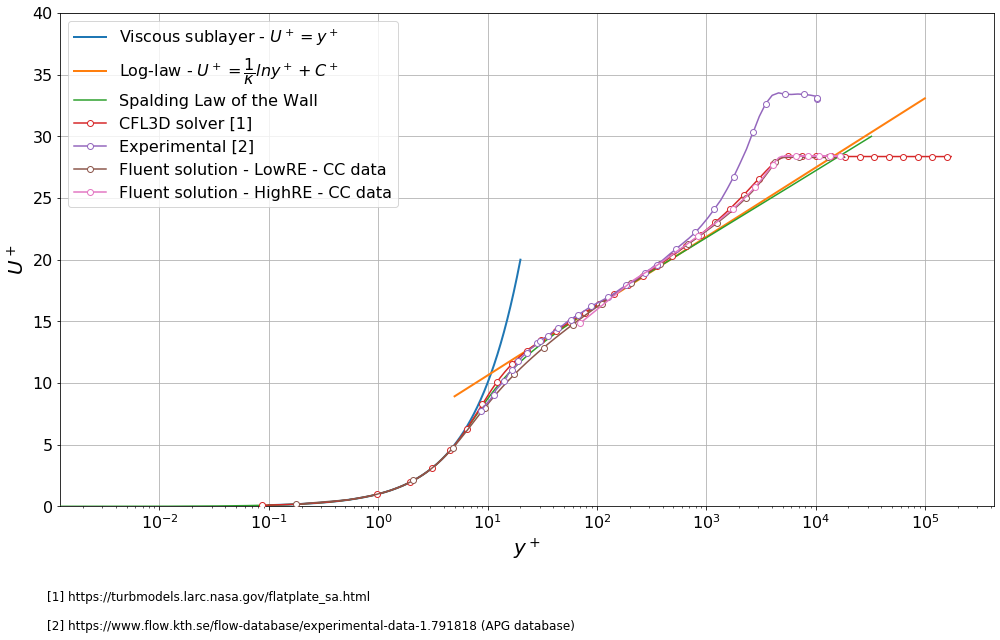

In [12]:
#Plot profiles

plt.figure(figsize=(14, 8))

#Correlations
plt.plot(yp1,up1,label='Viscous sublayer - $U^+=y^+$',lw=2)
plt.plot(yp2,up2,label='Log-law - $U^+ = \dfrac{1}{\kappa} ln y^+ + C^+$',lw=2)

plt.plot(sl,up3,'-',label='Spalding Law of the Wall',markerfacecolor='white',markevery=300,zorder=3)


#External data from cfl3d
plt.plot(al,cfl3d[:,1],'o-',label='CFL3D solver [1]',markerfacecolor='white',markevery=10,zorder=9)
#[1] https://turbmodels.larc.nasa.gov/flatplate_sa.html

    
#External data experiment
plt.plot(exp2[:,5],exp2[:,6],'-o',label='Experimental [2]',markerfacecolor='white',markevery=3,zorder=11)
#[2] https://www.flow.kth.se/flow-database/experimental-data-1.791818 (APG database)


#FLUENT
#plt.plot(ypn1[:],upn1[:],'-o',ms=6,label='Fluent solution - LowRE - CC data',markevery=1,
#             markerfacecolor='white',zorder=10)
#plt.plot(ypn2[:],upn2[:],'-o',ms=6,label='Fluent solution - HighRE - CC data',markevery=1,
#             markerfacecolor='white',zorder=12)

plt.plot(ypn1[:],upn1[:],'-o',ms=6,label='Fluent solution - LowRE - CC data',markevery=5,
             markerfacecolor='white',zorder=10)
plt.plot(ypn2[:],upn2[:],'-o',ms=6,label='Fluent solution - HighRE - CC data',markevery=5,
             markerfacecolor='white',zorder=12)


#Log-law region points
#plt.plot(ypn2[0:7],upn2[0:7],'o',ms=6,markerfacecolor='white',color='C4',zorder=12)

#plt.plot (ypn1[0],upn1[0],'o',ms=6,
#          markerfacecolor='white',color='C3',zorder=30)
#plt.plot (ypn2[0],upn2[0],'o',ms=6,
#          markerfacecolor='white',color='C4',zorder=32)


plt.xscale('log')
#plt.xlim(0,10000)
plt.ylim(0,40)

plt.grid()

plt.tick_params(labelsize=16)
plt.legend(loc=0,fontsize=16)

plt.xlabel('$y^+$', fontsize=20)
plt.ylabel('$U^+$', fontsize=20)

txt1="[1] https://turbmodels.larc.nasa.gov/flatplate_sa.html"
plt.figtext(0.05, -0.05, txt1, wrap=True, horizontalalignment='left', fontsize=12)

txt2="[2] https://www.flow.kth.se/flow-database/experimental-data-1.791818 (APG database)"
plt.figtext(0.05, -0.1, txt2, wrap=True, horizontalalignment='left', fontsize=12)

plt.tight_layout()

#plt.savefig("figbl.png")
#plt.savefig("figbl.svg")